In [1]:
import cv2

In [2]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("C:\\Users\\hp\\OneDrive\\Desktop\\face recognition\\haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)
        #scaling factor = 1.3
        #Minimum neighbour = 5

        if faces is ():
            return None
        for(x,y,w,h) in faces:
            cropped_face=img[y:y+h,x:x+w]
        return cropped_face
    cap = cv2.VideoCapture(0)
    id=1
    img_id=0

    while True:
        ret,frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame),(200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            #file_name_path = "data/user."+str(id)+"."+str(img_id)+".jpg"
            file_name_path = "Images for visualization/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path,face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0))
            #(50,50) IS THE ORIGIN POINT FROM WHERE TEXT IS TO BE WRITTEN
            # FONT SCALE=1
            #thickness=2

            cv2.imshow("Cropped face",face)
            if cv2.waitKey(1)==13 or int(img_id)==20:
                break
                cap.release()
                cv2.destroyALLWindows()
                print("collecting sample is completed........")
generate_dataset()

<>:9: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\hp\AppData\Local\Temp\ipykernel_549832\3056249081.py:9: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


In [5]:
import numpy as np # pip install numpy
def my_label(image_name):
    name = image_name.split('.')[-3] 
    #suppose your dataset contains two person
#     if name=="Ishwar":
#         return np.array([1,0])
#     elif name=="Manish":
#         return np.array([0,1])
    
    
    # suppose your dataset contains three person
    if name=="user.1":
        return np.array([1,0,0])

In [7]:
import os
from random import shuffle
from tqdm import tqdm
import cv2

In [9]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data




In [11]:
data = my_data()

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:01<00:00, 505.96it/s]


In [13]:
train = data[:100]  
test = data[100:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]


(100, 50, 50, 1)
(700, 50, 50, 1)


In [15]:
#create a model

In [1]:
# import warnings
# warnings.filterwarnings('ignore')
 
import tensorflow as tf
import tensorflow.keras.layers
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression



Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)



In [2]:
# Import necessary libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tflearn import input_data, conv_2d, max_pool_2d, fully_connected, dropout, regression, DNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Reset graph
tf.reset_default_graph()

# Load dataset (using CIFAR-10 as an example)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Start a session
with tf.Session() as sess:
    # Resize images to (50, 50) and convert to grayscale
    X_train = sess.run(tf.image.resize(X_train, (50, 50)))
    X_test = sess.run(tf.image.resize(X_test, (50, 50)))
    
# Convert images to grayscale (mean across color channels)
X_train = np.mean(X_train, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding (use 3 classes if only 3 are needed)
# Adjust `num_classes` if necessary
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the network
convnet = input_data(shape=[None, 50, 50, 1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 10, activation='softmax')  # Match num_classes
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

# Define the model
model = DNN(convnet, tensorboard_verbose=1)

# Train the model
model.fit(X_train, y_train, n_epoch=12, validation_set=(X_test, y_test), show_metric=True, run_id="FRS")


Training Step: 9383  | total loss: 0.94122 | time: 43.159s
| Adam | epoch: 012 | loss: 0.94122 - acc: 0.6946 -- iter: 49984/50000
Training Step: 9384  | total loss: 0.94111 | time: 45.175s
| Adam | epoch: 012 | loss: 0.94111 - acc: 0.6939 | val_loss: 1.12526 - val_acc: 0.6284 -- iter: 50000/50000
--


In [7]:
# lets visualize the data and make prediction

In [9]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [11]:
Vdata = data_for_visualization()

NameError: name 'tqdm' is not defined

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # Import tqdm for the progress bar
from random import shuffle  # Import shuffle for shuffling the data

def data_for_visualization(directory="Images for visualization"):
    Vdata = []
    
    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"The directory '{directory}' does not exist. Creating it now...")
        os.makedirs(directory)
        print(f"Directory '{directory}' created. Please add images to it and re-run the script.")
        return Vdata  # Return empty if no images are available
    
    # Process each image in the directory
    for img in tqdm(os.listdir(directory), desc="Processing Images"):
        path = os.path.join(directory, img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img_data is None:
            print(f"Warning: Unable to read file '{path}'. Skipping...")
            continue
        img_data = cv2.resize(img_data, (50, 50))  # Resize to (50, 50)
        Vdata.append([np.array(img_data), img_num])
    
    shuffle(Vdata)  # Shuffle the data
    return Vdata

# Call the function
Vdata = data_for_visualization()


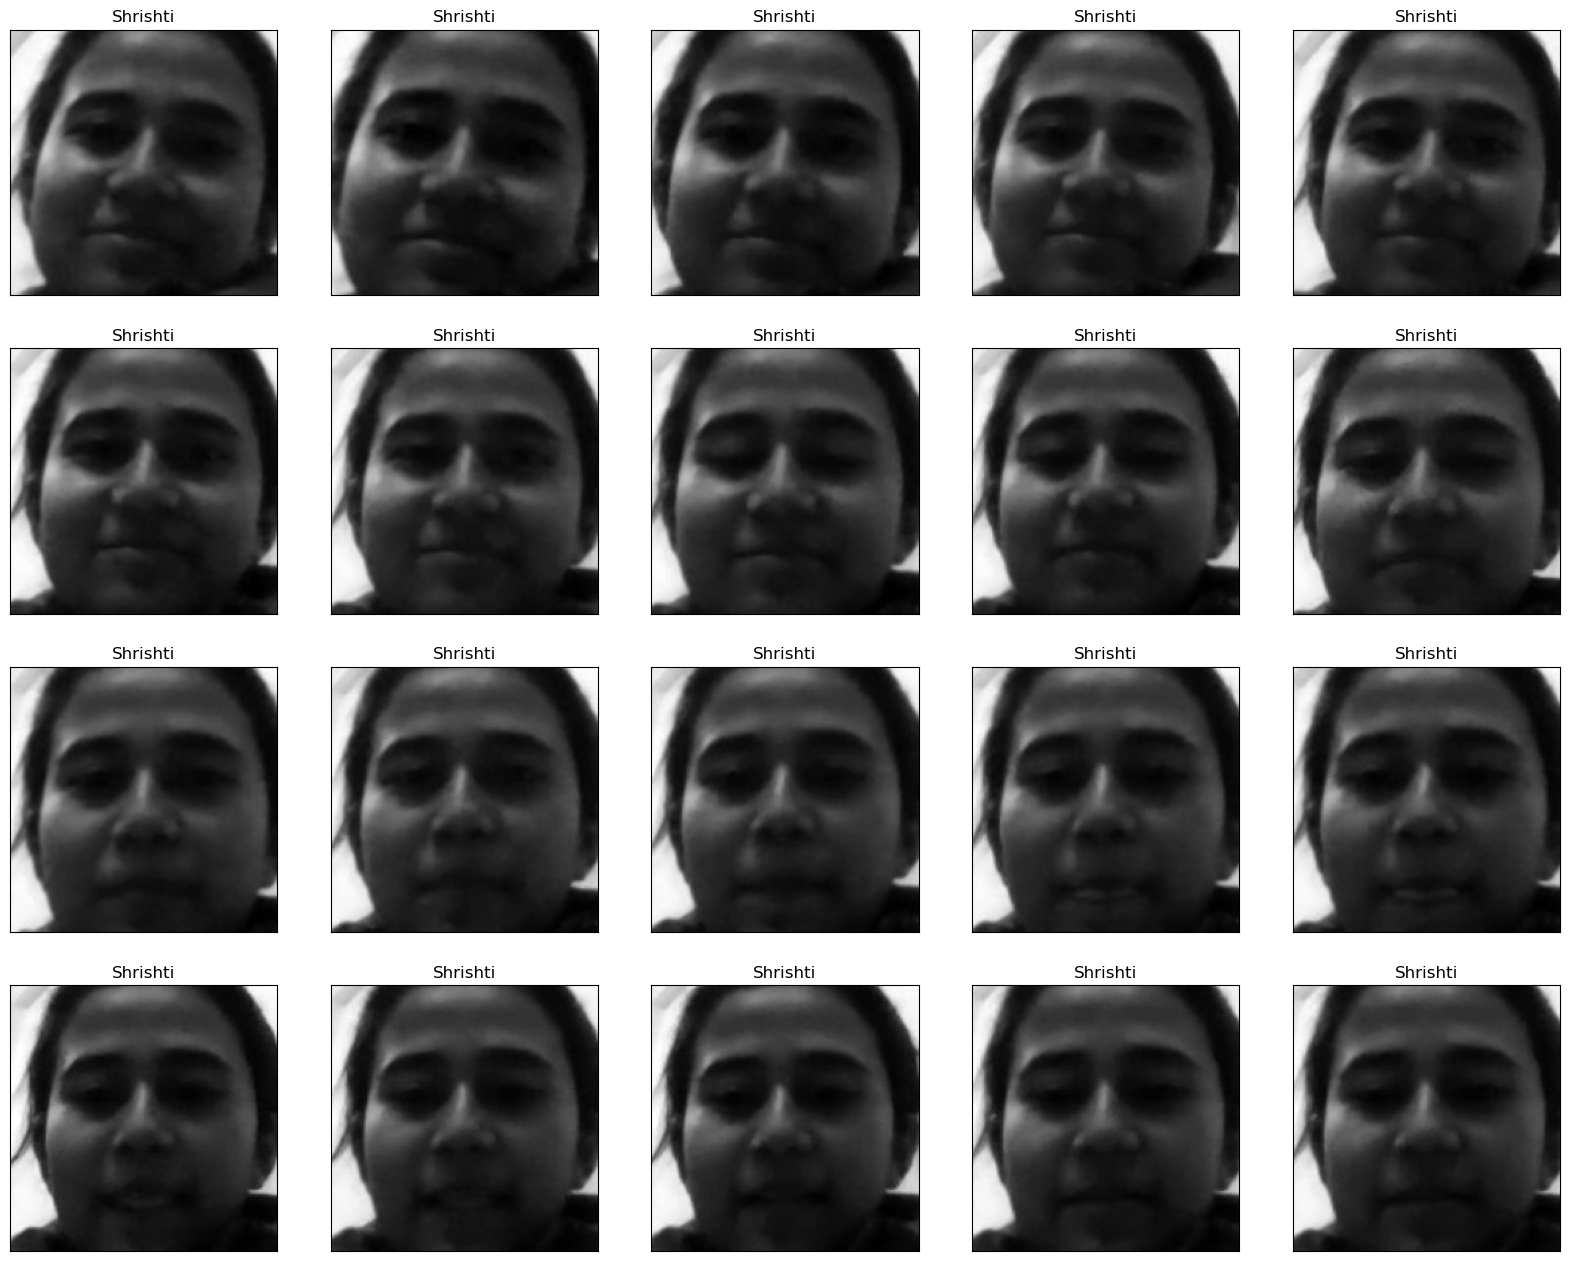

In [21]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing the images
image_directory = r'C:\\Users\\hp\\OneDrive\\Desktop\\face recognition\\Images for visualization'

# Create a list to store image data and labels
Vdata = []

# Load each image and append to Vdata
for i in range(20):
    # Corrected file path without extra quotes
    image_path = os.path.join(image_directory, f'user.1.{i+1}.jpg')  # Ensure this points to valid files
    img = Image.open(image_path).convert('L')  # Convert to grayscale (if required)
    img_data = np.array(img)
    Vdata.append((img_data, 'Shrishti'))  # Add image data with label

# Create the plot
fig = plt.figure(figsize=(20, 20))

# Iterate through the images in Vdata and display them
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]  # Image data
    y = fig.add_subplot(5, 5, num + 1)  # Create a subplot

    # Show the image with the title
    y.imshow(img_data, cmap='gray', aspect='auto')  # Keep aspect ratio correct
    plt.title('Shrishti')  # Set the title to 'Shrishti' (or use your actual model prediction)

    # Remove axes for cleaner display
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()
